# Étude de Cas sur les Données Clients et Passages

## 1. Introduction

Dans le cadre de cette étude de cas pour Arkose&co, l'objectif est d'analyser un jeu de données représentant les passages de clients ayant cessé de fréquenter les salles d'escalade Arkose à la fin de l'année 2022. Cette analyse vise à répondre à plusieurs questions commerciales clés afin de mieux comprendre les comportements des clients et d'identifier des pistes d'amélioration pour prévenir la perte de clients à l'avenir.

## Objectifs de l'étude

- **Calculer la moyenne d'âge des clients** : Cette information permet de mieux comprendre la démographie des clients qui ont cessé de venir.
- **Déterminer la proportion de passages en Tarif Réduit** : Cela aide à évaluer l'impact des tarifs sur la fidélisation des clients.
- **Visualiser les passages par mois et par année** : Un graphe permettra de visualiser les tendances saisonnières et annuelles des passages.
- **Suggérer des raisons possibles pour la cessation de fréquentation** : En se basant sur les données et des hypothèses, nous proposerons des explications potentielles.
- **Identifier une métrique pour prédire les clients démissionnaires** : Nous chercherons une métrique qui pourrait aider à anticiper les départs de clients.
- **Suggestions stratégiques pour conserver la clientèle** : Propositions d'actions concrètes basées sur les insights obtenus pour améliorer la rétention des clients.

## Méthodologie

Pour répondre à ces questions, nous utiliserons les fichiers de données fournis :
- `arkose - data analyst test - clients.csv`
- `arkose - data analyst test - passages.csv`

Les outils et techniques suivants seront employés pour l'analyse :
- **Python** : Pour des analyses avancées et des visualisations.
- **Jupyter Notebook** : Pour documenter et exécuter le code de manière interactive.
- **MySQL** : Pour stocker et interroger les données de manière efficace.
- **Bibliothèques Python** :
  - `pandas` pour la manipulation et l'analyse des données.
  - `sqlalchemy` et `pymysql` pour l'interaction avec la base de données MySQL.
  - `matplotlib` pour la création de visualisations.


## 2. Collecte des Données
Nous allons commencer par charger les fichiers .csv avec les données des clients et de passage

In [ ]:
# Cellule des imports
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import text
from urllib.parse import quote
import pymysql
import matplotlib.pyplot as plt

In [126]:
# Import des données clients
clients = pd.read_csv('arkose - data analyst test - clients.csv')

# Affichage de premières lignes pour verification
print("premières lignes des clients : ")
print(clients.head())

premières lignes des clients : 
   ID Client Etablissement Inscription     Date Inscription Date de naissance
0    1559573              Arkose Lille  2021-06-30 11:42:51        1999-02-09
1    1319810              Arkose Lille  2020-07-20 19:16:16        1996-04-06
2    1263568           Arkose Toulouse  2020-06-05 17:22:07        2004-10-04
3    1282434              Arkose Lille  2020-06-25 16:27:43        1991-03-22
4    1613035             Arkose Nation  2021-07-26 18:33:02        1995-02-14


In [128]:
# Import des données des passages
passages = pd.read_csv('arkose - data analyst test - passages.csv')
print("premières lignes des passages: ")
print(passages.head())

premières lignes des passages: 
          Date Passage    Etablissement  ID Client Type Forfait  \
0  2020-06-05 19:21:35  Arkose Toulouse    1263568        Unité   
1  2020-06-15 11:45:45  Arkose Toulouse    1268925      Mensuel   
2  2020-06-15 16:00:18  Arkose Toulouse    1263568       Carnet   
3  2020-06-18 10:58:13  Arkose Toulouse    1268925      Mensuel   
4  2020-06-19 16:12:13  Arkose Toulouse    1268925      Mensuel   

                   Designation  Quantite  
0        1 séance Tarif réduit         1  
1           Abonnement mensuel         1  
2  Carnet de 10\n Tarif réduit         1  
3           Abonnement mensuel         1  
4           Abonnement mensuel         1  


## 3. Exploration Initiale des Donnée
### Compréhension des données
Nous allons à présent exporer la structure de nos données.

In [130]:
# Structure du dataset clients
print ("Informations sur les clients :")
print(clients.info())

Informations sur les clients :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID Client                  99 non-null     int64 
 1   Etablissement Inscription  99 non-null     object
 2   Date Inscription           99 non-null     object
 3   Date de naissance          99 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB
None


In [132]:
# Structure du dataset passages
print("Informations sur les passages :")
print (passages.info())

Informations sur les passages :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6492 entries, 0 to 6491
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date Passage   6492 non-null   object
 1   Etablissement  6492 non-null   object
 2   ID Client      6492 non-null   int64 
 3   Type Forfait   6492 non-null   object
 4   Designation    6492 non-null   object
 5   Quantite       6492 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 304.4+ KB
None


## 4. Pré-Traitement des données
### Traitement des Valeurs Manquantes
Nous allons isoler et traiter les valeurs manquantes dans nos deux datasets

In [134]:
# Valeurs manquantes dans les clients : 
print("Valeurs manquantes dans les clients : ")
print(clients.isnull().sum())

# Valeurs manquantes des les passages
print("\nValeurs manquantes dans les passages :")
print(passages.isnull().sum())

Valeurs manquantes dans les clients : 
ID Client                    0
Etablissement Inscription    0
Date Inscription             0
Date de naissance            0
dtype: int64

Valeurs manquantes dans les passages :
Date Passage     0
Etablissement    0
ID Client        0
Type Forfait     0
Designation      0
Quantite         0
dtype: int64


Parfait, nous n'avons aucune valeur manquante

### Conversion des colonnes de date
Nous allons convertir les dates au format datetime

In [136]:
# Conversion en datetime dans les datasets
clients['Date Inscription'] = pd.to_datetime(clients['Date Inscription'], errors='coerce')
clients['Date de naissance'] = pd.to_datetime(clients['Date de naissance'], errors ='coerce')
passages['Date Passage'] = pd.to_datetime(passages['Date Passage'], errors='coerce')

# Vérification des types de données
print("Types de données de clients :")
print(clients.dtypes)
print("\nTypes de données de passages :")
print(passages.dtypes)

Types de données de clients :
ID Client                             int64
Etablissement Inscription            object
Date Inscription             datetime64[ns]
Date de naissance            datetime64[ns]
dtype: object

Types de données de passages :
Date Passage     datetime64[ns]
Etablissement            object
ID Client                 int64
Type Forfait             object
Designation              object
Quantite                  int64
dtype: object


### Traitement des éventuels doublons
Indentification et suppression des doublons

In [138]:
print("\nNombre de doublons dans clients :")
print(clients.duplicated().sum())
print("\nNombre de doublons dans passages :")
print(passages.duplicated().sum())
passages_duplicates = passages.duplicated().sum() / len(passages) * 100
print(f"Pourcentage de doublons dans le dataset passages : {passages_duplicates:.2f} %")


Nombre de doublons dans clients :
0

Nombre de doublons dans passages :
2
Pourcentage de doublons dans le dataset passages : 0.03 %


Observations: 
- "clients" est vierge de doublons. 
- "passages" contients un nombre insignifiant de doublons. En tenant compte de l'ampleur des entrées du dataset (6492), nous optons pour une suppression des doublons, estimant que cela n'aura aucune incidence sur les résultats de cette étude.

In [140]:
# Suppression des doublons 
passages.drop_duplicates(inplace=True)

### Incohérence des données
Nous allons tout d'abord ajouter une variable (colonne) "age" au dataframe "clients" pour dans un premier temps vérifier d'éventuelles incohérences. Nous prenons comme date de référence le 31/12/2022.

In [142]:
# Création de la variable "age"
date_reference = pd.to_datetime('2022-12-31')

# Calcul de l'age des clients
clients['age'] = ((date_reference.year - clients['Date de naissance'].dt.year) - 
                  ((date_reference.month < clients['Date de naissance'].dt.month) |
                   ((date_reference.month == clients['Date de naissance'].dt.month) &
                    (date_reference.day < clients['Date de naissance'].dt.day))))

# Vérification de la création de la variavble 'age'
print(clients[['Date de naissance', 'age']].sample(1))

  Date de naissance  age
0        1999-02-09   23


In [144]:
# Compte des incohérences liées a 'age'
incoherence_age = clients[(clients['age'] < 0) | (clients['age'] > 120)]
print(f"Nombres d'incohérences trouvées : {len(incoherence_age)}")

Nombres d'incohérences trouvées : 0


### Bilan du Prétraitement :
Pas d'incohérence sur les âges, deux doublons (supprimés), aucune valeur manquante. Nos avons standardisé les dates.

## 5. Création de la base de donnée et des tables
Création d'une DATABASE ARKOSE et de 2 TABLES Clients et passages

In [ ]:
# Connection à au serveur SQL local (à remplacer pour vos paramètres de connection)
connection = pymysql.connect(
    host='localhost',
    user= 'root',
    password= 'cN06+#P34'
)

# Création de la base de données
with connection.cursor() as cursor:
    cursor.execute("CREATE DATABASE IF NOT EXISTS ARKOSE CHARACTER SET utf8mb4 COLLATE utf8MB4_unicode_ci")
    connection.close()

# Connection à la base de données
engine = create_engine('mysql+pymysql://root:%s@localhost:3306/ARKOSE' % quote('cN06+#P34'))

#Import simple des données nettoyées des dataframes et création des tables
clients.to_sql('clients', engine, if_exists='replace', index=False)
passages.to_sql('passages', engine, if_exists='replace', index=False)
                
print("Tables créées avec succès !")
print(f"- clients : {len(clients)} lignes")
print(f"- passages : {len(passages)} lignes")

Tables créées avec succès !
- clients : 99 lignes
- passages : 6490 lignes


In [154]:
print("Structure de la table 'clients':")
display(pd.read_sql("DESCRIBE clients", engine))

print("Structure de la table 'passages' : ")
display(pd.read_sql("DESCRIBE passages", engine))

Structure de la table 'clients':


,Field,Type,Null,Key,Default,Extra
0,ID Client,bigint,YES,,None,
1,Etablissement Inscription,text,YES,,None,
2,Date Inscription,datetime,YES,,None,
3,Date de naissance,datetime,YES,,None,
4,age,int,YES,,None,


Structure de la table 'passages' : 


,Field,Type,Null,Key,Default,Extra
0,Date Passage,datetime,YES,,None,
1,Etablissement,text,YES,,None,
2,ID Client,bigint,YES,,None,
3,Type Forfait,text,YES,,None,
4,Designation,text,YES,,None,
5,Quantite,bigint,YES,,None,


In [122]:
# Afficher les 5 premiers clients
display(pd.read_sql(text("SELECT * FROM clients LIMIT 3"), engine))

# Afficher les 5 premiers passages
display(pd.read_sql(text("SELECT * FROM passages LIMIT 3"), engine))

TypeError: 'Text' object is not callable

## 6.Analyse Exploratoire des Données
### Calcul de la moyenne d'âge des clients

In [112]:
with engine.connect() as conn:
    result = conn.execute(text("""
        SELECT ROUND(AVG(age)) AS age_moyen
        FROM clients
        WHERE age IS NOT NULL
    """))

    age_moyen = result.scalar()

print(f"Age moyen des clients: {age_moyen} ans")


TypeError: 'Text' object is not callable

### Calcul de la proportion de passages en Tarif Réduit

In [100]:
# Pour calculer la proportion en "Tarif Réduit" il va filtrer "réduit" dans les strings contenues dans "Designation"
# On prendra en compte les différentes cassses (Réduit, Reduit, réduit, reduit)

with engine.connect() as conn:
    result = conn.execute(text("""
               SELECT
                 ROUND(
                     SUM(
                      CASE
                         WHEN LOWER(REPLACE(Designation,'é', 'e')) LIKE '%reduit'
                         THEN 1 ELSE 0
                      END
                 ) *100.0 /COUNT(*),
                  2
            ) AS prop_tarif_reduit
            FROM passages
            WHERE Designation IS NOT NULL;
    """))

proportion_tarif_reduit = result.scalar()

print(f"Proportion de passages en Tarif  Réduit : {proportion_tarif_reduit:.2f}%")
                         

Proportion de passages en Tarif  Réduit : 63.57%


### Courbes des fréquentations

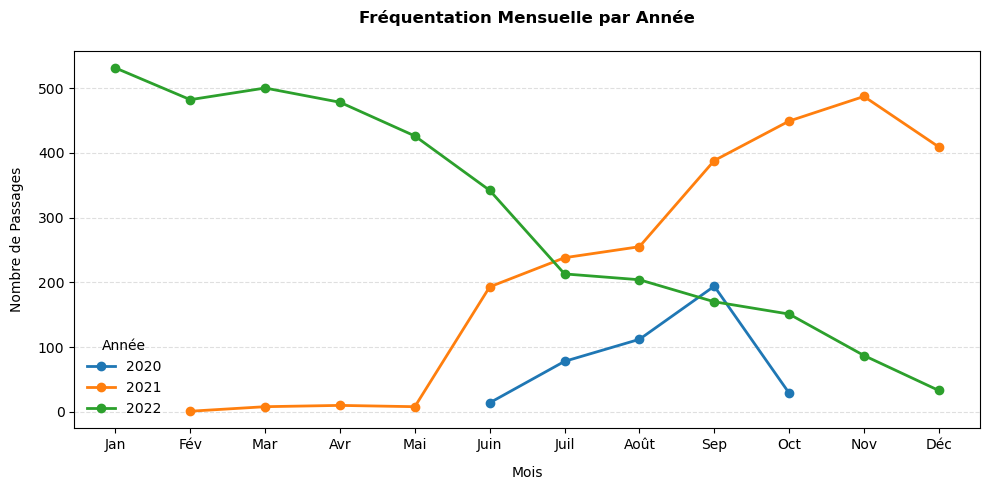

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import text

#  Récupérer les données
df = pd.read_sql(text("""
    SELECT 
        YEAR(`Date Passage`) AS annee,
        MONTH(`Date Passage`) AS mois,
        COUNT(*) AS passages
    FROM passages
    GROUP BY annee, mois
    ORDER BY annee, mois
"""), engine)

#  Préparer les mois 
mois_fr = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 
           'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']

# Créer le graphique
plt.figure(figsize=(10, 5))

for annee in df['annee'].unique():
    data = df[df['annee'] == annee]
    plt.plot(data['mois'], data['passages'], 
             marker='o', 
             label=annee, 
             linewidth=2)

# Affichage perso
plt.title('Fréquentation Mensuelle par Année', pad=20, fontweight='bold')
plt.xlabel('Mois', labelpad=10)
plt.ylabel('Nombre de Passages', labelpad=10)
plt.xticks(range(1, 13), mois_fr)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title='Année', frameon=False)

plt.tight_layout()  
plt.show()

#### Observation des courbes : 
Les années 2020 et 2021 sont un reflet des periodes d'entrées et sorties de confinenement COVID:
- Hausse des fréquentations en juin 2020 (sortie du premier confinement), puis chute de septembre à octobre (début du second confinement)
- de fin octobre2020 à début février 2021: Fréquentation inexistante, probablement en   raison du second confinement et du couvre feu strict.
- Reprise, mais atonie des fréquentations dû au couvre feu strict.
- Fin du couvre feu strict=> reprise des fréquentations en flêche.
- Cette montée se casse en novembre 2021, et les courbes montrent une baisse des fréquentation jusqu'en fin décembre 2022. 

### Recherche complémentaire: Répartition des dates d'inscriptions des clients

In [104]:
query = """
SELECT `ID Client`, `Date Inscription`
FROM clients
WHERE `Date Inscription` IS NOT NULL
"""

df = pd.read_sql(text(query), engine)

# Conversion des dates en format pandas
df['Date Inscription'] = pd.to_datetime(df['Date Inscription'])

#  Extraction de l'année d'inscription
df['annee_inscription'] = df['Date Inscription'].dt.year

# Comptage des clients par année d'inscription
repartition = df['annee_inscription'].value_counts().sort_index()

# Définir un intervalle d'années pour l'affichage
annees_completes = range(df['annee_inscription'].min(), df['annee_inscription'].max() + 1)

# ompléter la répartition pour chaque année de l'intervalle, même celles avec 0
repartition_complete = repartition.reindex(annees_completes, fill_value=0)

print("Répartition des clients démissionnaires par année d'inscription :")
print(repartition_complete)

Répartition des clients démissionnaires par année d'inscription :
annee_inscription
2020    39
2021    57
2022     3
Name: count, dtype: int64


Observations: 
-39/99 se sont inscrits en 2020
-57/99 en 2021
-3/99 en 2022
Les données révèlent que les clients démissionnaires concernés se sont tous inscrits dans les périodes post restrictions COVID.

### Conclusions (pour répondre au point 4 du sujet) :
D'après notre étude, il apparaît que nous avons à faire à des clients ayant effectué leur inscription durant une période exceptionnelle, marquée par la pandémie de Covid-19. Les spécificités de cette période — telles que le confinement, le manque d'activités et l'isolement — ont indéniablement contribué à un désir accru de reprendre une activité physique, en particulier dans les agglomérations, zones d'implantation des salles ARKOSE.

De plus environ 64 % de la clientèle est en tarif réduit (étudiants, chômeurs)  => Clientèle potentielement volatile.

Il est fort probable que cette clientèle, une fois la motivation initiale dissipée, n'ait pas réussi ou n'ait pas souhaité maintenir une routine régulière de fréquentation. Ce phénomène peut être mis en parallèle avec les bonnes résolutions de début d'année, où les engagements prennent souvent une dimension plus éphémère. En somme, la situation exceptionnelle du Covid explique en grande partie l'évolution des courbes observées, tant en termes de pics d'inscription que de désengagement par la suite.

### 7. Analyse des "Clients de la Motivation Éphémère"

Pour affiner nos études et proposer des recommandations pertinentes, nous devons approfondir nos recherches.

### 7.1 Étude de la répartition de la précocité des abandons

Ce graphique illustre la répartition des clients en fonction de leur fidélité, mesurée par le nombre de jours écoulés entre leur inscription et leur dernier passage. La majorité des clients continuent de fréquenter la salle pendant plus de 18 mois, tandis qu'une minorité cesse de venir après 3 mois.

Répartition des données:
Tranche
≤3 mois        0
3-6 mois       0
6-9 mois       6
9-12 mois     12
12-18 mois    44
>18 mois      37
Name: count, dtype: int64


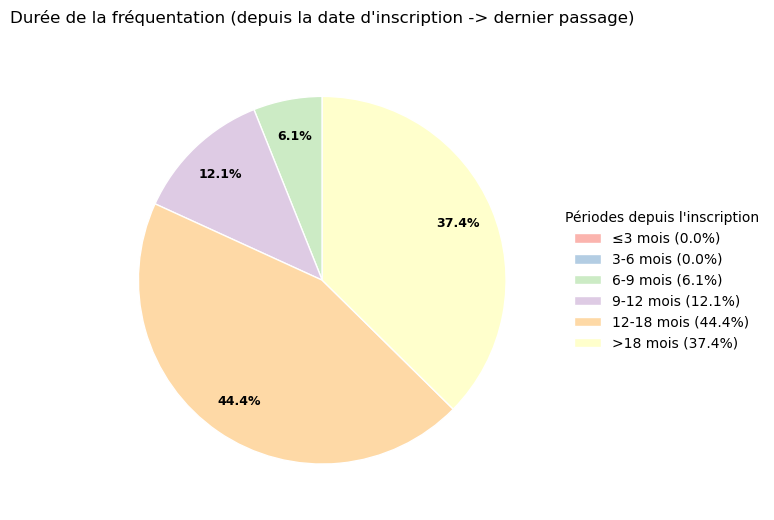

In [106]:
from sqlalchemy import text

## 1. Requête SQL
with engine.connect() as conn:
    df_result = pd.read_sql(text("""
        SELECT
            c.`ID Client`,
            c.`Date Inscription`,
            MAX(p.`Date Passage`) AS Dernier_Passage,
            DATEDIFF(MAX(p.`Date Passage`), c.`Date Inscription`) AS Jours_absence
        FROM clients c
        JOIN passages p ON c.`ID Client` = p.`ID Client`
        GROUP BY c.`ID Client`, c.`Date Inscription`
    """), conn)

## 2. Préparation des données
bins = [0, 90, 180, 270, 360, 540, float('inf')]
labels = ['≤3 mois', '3-6 mois', '6-9 mois', '9-12 mois', '12-18 mois', '>18 mois']
df_result['Tranche'] = pd.cut(df_result['Jours_absence'], bins=bins, labels=labels, right=False)

# Vérification des données
print("Répartition des données:")
print(df_result['Tranche'].value_counts().sort_index())

## 3. Création du graphique
plt.figure(figsize=(7, 7))  # Taille intermédiaire pour meilleur équilibre

# Calcul des pourcentages
pourcentages = df_result['Tranche'].value_counts(normalize=True).sort_index() * 100

# Création du pie chart avec tous les éléments
patches, texts, autotexts = plt.pie(
    pourcentages,
    colors=plt.cm.Pastel1(range(len(labels))),
    startangle=90,
    pctdistance=0.8,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    autopct=lambda p: f'{p:.1f}%' if p >= 5 else ''  # Masque les petits pourcentages
)

# Amélioration de l'affichage des pourcentages
for text in autotexts:
    text.set_color('black')
    text.set_fontsize(9)
    text.set_fontweight('bold')

# Légende corrigée (sans avertissement)
plt.legend(
    handles=patches,
    labels=[f"{l} ({p:.1f}%)" for l, p in zip(pourcentages.index, pourcentages)],
    title="Périodes depuis l'inscription",
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False
)

plt.title("Durée de la fréquentation (depuis la date d'inscription -> dernier passage)", pad=20, fontsize=12)
plt.tight_layout()
plt.show()


### 7.3 Étude de la moyenne de fréquentation sur les 12 mois précédant la désertion des clients concernés

**Pour répondre au point 5 du sujet, nous pensons que la métrique à considérer pour identifier la clientèle démissionnaire est la fréquentation des clients sur les mois précédant leurs départs.**

En étudiant la courbe de fréquentation moyenne par client sur les 12 derniers mois, on observe qu'après un pic autour de 5 visites par mois (M-5), cette dernière diminue de manière inexorable sur les 7 derniers mois. Par rapport au point haut, le nombre de visites moyen par mois est presque divisé par deux le mois précédant le départ des clients (M-12). De plus, leurs départs se produisent après une baisse constante sur les 3 derniers mois, avec une chute notable de 3,42 visites (M-10) à 2,65 visites (M-12).

In [108]:
# Chargement des données depuis la base
query = text("SELECT `Date Passage`, `ID Client` FROM passages")
passages_df = pd.read_sql(query, engine)

# Conversion des dates
passages_df['Date Passage'] = pd.to_datetime(passages_df['Date Passage'])

# Calcul des fréquentations mensuelles par client
def calculate_monthly_visits(df):
    # Trouver la dernière date de passage pour chaque client
    last_visits = df.groupby('ID Client')['Date Passage'].max().reset_index()
    
    # Initialiser le DataFrame résultat
    result = pd.DataFrame({'ID Client': df['ID Client'].unique()})
    
    # Initialiser les colonnes des mois avec des zéros
    for i in range(1, 13):
        result[f'mois_{i}'] = 0
    
    # Pour chaque client
    for index, row in last_visits.iterrows():
        client_id = row['ID Client']
        last_date = row['Date Passage']
        
        # Passages de ce client uniquement
        client_passages = df[df['ID Client'] == client_id]
        
        # Pour chaque mois en remontant à partir de la dernière visite
        for month_offset in range(12):
            # Calculer la période du mois
            end_month = last_date.replace(day=1) - pd.DateOffset(months=month_offset)
            end_date = end_month + pd.DateOffset(months=1) - pd.DateOffset(days=1)
            start_date = end_month
            
            # Compter les passages dans ce mois
            month_visits = client_passages[
                (client_passages['Date Passage'] >= start_date) & 
                (client_passages['Date Passage'] <= end_date)
            ]
            
            # Stocker le résultat (mois_12 = plus récent)
            month_col = f'mois_{12 - month_offset}'
            result.loc[result['ID Client'] == client_id, month_col] = len(month_visits)
    
    return result

# Exécuter le calcul
frequentations_mensuelles = calculate_monthly_visits(passages_df)

# Calcul de la fréquentation moyenne par mois
moyenne_par_mois = []
labels_mois = []

for i in range(1, 13):
    mois_col = f'mois_{i}'
    moyenne = frequentations_mensuelles[mois_col].mean()
    moyenne_par_mois.append(moyenne)
    labels_mois.append(f"M-{i}")  # M-12 est le plus récent, M-1 est le plus ancien

# Création de la courbe de fréquentation moyenne
plt.figure(figsize=(12, 6))

# Tracé de la courbe principale
plt.plot(labels_mois, moyenne_par_mois, 'o-', linewidth=2, markersize=8, color='#1f77b4')

# Affichage
plt.fill_between(labels_mois, moyenne_par_mois, alpha=0.2, color='#1f77b4')

plt.title('Évolution de la fréquentation moyenne par mois sur les 12 derniers mois', fontsize=14)
plt.xlabel('Mois relatif (M-1 = plus ancien, M-12 = plus récent)', fontsize=12)
plt.ylabel('Nombre moyen de visites', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

for i, v in enumerate(moyenne_par_mois):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()

# Afficher également les statistiques numériques
statistiques = pd.DataFrame({
    'Mois': labels_mois,
    'Moyenne': moyenne_par_mois,
})


TypeError: 'Text' object is not callable

### Conclusion

D'après nos observations, les clients ne désertent pas complètement les salles Arkose avant 6 mois. En outre, une grande majorité (environ 80 %) ne cesse de fréquenter les salles qu'après 12 mois ou plus. Ces constatations montrent que le phénomène de désertion chez Arkose diffère du "syndrome des salles de musculation", où les clients abandonnent souvent dans les 3 mois suivant leur inscription.

De plus, l'indicateur clé à surveiller est une baisse de la fréquentation sur plus de deux mois consécutifs. Cette tendance est souvent un signe précurseur d'un désengagement progressif, qui peut mener à une désertion définitive si elle n'est pas adressée.

Cette analyse met en lumière une fidélité plus durable des clients d'Arkose, ce qui suggère que les stratégies de rétention doivent être adaptées en conséquence. Plutôt que de se concentrer uniquement sur les premiers mois, il serait pertinent de renforcer les actions de fidélisation sur le long terme, notamment après les 6 premiers mois, pour maintenir l'engagement des clients et prévenir les départs ultérieurs.

Ces insights peuvent guider des initiatives ciblées, telles que des offres spéciales, des programmes de fidélité ou des communications personnalisées, pour soutenir la rétention des clients sur une période prolongée.


### 8. Nos recommandations stratégiques

Nous allons à présent nous penchez sur la composition de la clientèle et son comportement de consommation.

### 8.1 Analyse des types de forfaits

La forte proportion du mensuel (2/3 des abonnements) indique une préférence marquée pour des engagements courts

L'annuel représente 1/4 des choix, montrant qu'une partie significative des clients privilégie les économies

Le carnet reste une option niche

Répartition des types de forfaits :
Type Forfait  nombre_utilisations  Proportion
     Mensuel                 4316   66.481824
      Annuel                 1622   24.984596
      Carnet                  456    7.024030
       Unité                   98    1.509550


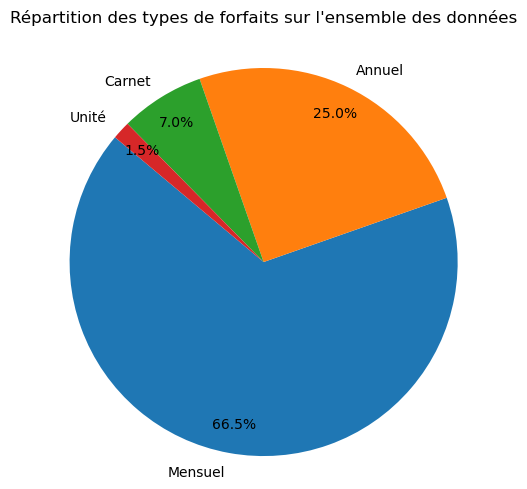

In [49]:
query = """
SELECT 
    `Type Forfait`, 
    COUNT(*) AS nombre_utilisations
FROM 
    passages
GROUP BY 
    `Type Forfait`
ORDER BY 
    nombre_utilisations DESC;
"""

# Charger les résultats 
df = pd.read_sql(query, engine)

# Calculer la proportion de chaque type d'abonnement
df['Proportion'] = (df['nombre_utilisations'] / df['nombre_utilisations'].sum()) * 100

# Afficher les données sous forme de tableau
print("Répartition des types de forfaits :")
print(df[['Type Forfait', 'nombre_utilisations', 'Proportion']].to_string(index=False))

# Afficher 
plt.figure(figsize=(5, 5))
plt.pie(df['nombre_utilisations'], 
        labels=df['Type Forfait'], 
        autopct='%1.1f%%', 
        startangle=140,
        pctdistance=0.85,
        textprops={'fontsize': 10})
plt.title("Répartition des types de forfaits sur l'ensemble des données", pad=20)
plt.axis('equal')

# Ajouter une légende si trop de catégories
if len(df) > 5:
    plt.legend(df['Type Forfait'], 
               title="Types de forfaits",
               loc="center left",
               bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

### 8.2 Répartition de la clientèle par tranche d'ages.

#### Observations principales
- **Clientèle majoritairement jeune** :
  - Les 21-30 ans représentent **75.75%** du total (38.38% + 37.37%)
  - Pic particulièrement marqué chez les **21-25 ans** (38.38%)

- **Faible représentation** des autres tranches :
  - Seulement **5.05%** pour les 17-20 ans
  - Moins de **5%** pour chaque tranche au-delà de 31 ans

  age_group  count  percentage
0     17-20      5     5.05051
1     21-25     38    38.38384
2     26-30     37    37.37374
3     31-35     13    13.13131
4     36-40      4     4.04040
5     41-45      1     1.01010
6     46-47      1     1.01010


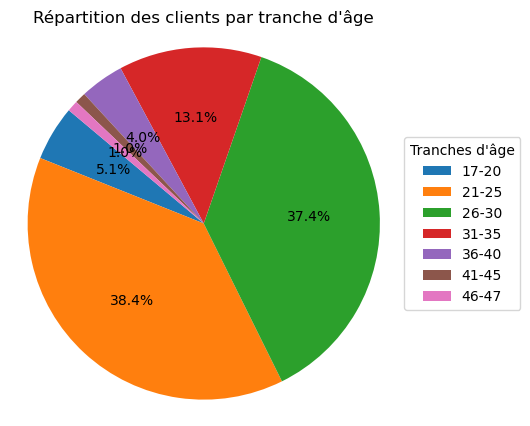

In [46]:
query = """
SELECT
    CASE
        WHEN age BETWEEN 17 AND 20 THEN '17-20'
        WHEN age BETWEEN 21 AND 25 THEN '21-25'
        WHEN age BETWEEN 26 AND 30 THEN '26-30'
        WHEN age BETWEEN 31 AND 35 THEN '31-35'
        WHEN age BETWEEN 36 AND 40 THEN '36-40'
        WHEN age BETWEEN 41 AND 45 THEN '41-45'
        WHEN age BETWEEN 46 AND 47 THEN '46-47'
        ELSE 'Autre'
    END AS age_group,
    COUNT(*) AS count,
    (COUNT(*) * 100.0 / (SELECT COUNT(*) FROM clients WHERE age BETWEEN 17 AND 47)) AS percentage
FROM
    clients
WHERE
    age BETWEEN 17 AND 47
GROUP BY
    age_group
ORDER BY
    MIN(age);
"""

# Exécution de la requête SQL et stockage des résultats dans un DataFrame
desertion_ages = pd.read_sql(query, engine)
print(desertion_ages)


# Vérifier si les colonnes nécessaires existent
if 'age_group' in desertion_ages.columns and 'percentage' in desertion_ages.columns:
    # Créer le graphique en camembert
    plt.figure(figsize=(5, 5))
    wedges, texts, autotexts = plt.pie(desertion_ages['percentage'], labels=None, autopct='%1.1f%%', startangle=140)
    plt.title('Répartition des clients par tranche d\'âge')
    plt.axis('equal')  # Assure que le camembert est un cercle

    # Ajouter une légende
    plt.legend(wedges, desertion_ages['age_group'], title="Tranches d'âge", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.show()
else:
    print("Les colonnes nécessaires 'age_group' et 'percentage' ne sont pas présentes dans le DataFrame.")

## Recommandations: 

### Vigilance Stratégique
- **Surveiller** : Taux de fréquentation en baisse sur + de 2 mois
- **Anticiper** : Pic de désengagement post-2ème année (cycle observé)

### Recommandations Stratégiques pour la Rétention Client Post-9 Mois

#### 1. Programme - Abonnement Communautaire 
**Cible Stratégique** 
- Clients âgés de 21-25 ans (38,4% du portefeuille)  
- Profil type : Étudiants/en début de carrière, sensibles aux interactions sociales  

**Mécaniques Clés**  
- Pack duo/trío (-20%) => Augmente l'engagement mutuel => Marge réduite compensée par volume  
- Soirées "Climb & Drink" (partenariats) => Crée un écosystème social => Coût négligeable 
- Zone lounge exclusive => Fidélise par sentiment d'appartenance => Investissement modéré 

#### 2. Programme - Fidélisation Haut Niveau  
**Cible Stratégique**  
- Clients fidèles (9+ mois d'ancienneté)  
- En risque de lassitude (fréquentation en baisse)  

**Architecture des Avantages**  
- Bronze | 9 mois | Mur privé 1h/semaine 
- Argent | 12 mois | Événement outdoor 
- Or | 18 mois | Réduction 30% sur 6 mois 

**Résultat Attendu**  
- Réduction de 25% du churn post-9 mois  

#### 3. Programme - Fidélisation à Long Terme

**Cible Stratégique** 
- Clients ayant atteint 10-12 mois d'ancienneté
- Top 20% des clients en termes de fréquentation
- Profils influents (parrains naturels)

**Architecture des Avantages**  

- **Année 1** | -10% shop => Sentiment de progression 
- **Année 2** | Accès 24/7 => Statut "membre hardcore" 
- **Année 3** | Programme parrainage (5% cashback) => Valorisation sociale 



> "La fidélisation post-12 mois nécessite une approche systémique combinant leviers sociaux et mécaniques de progression." — [Paul-Emmanuel Buffe]